# [NML23] Assignment 1: Graph theory basics

TAs: [Ortal Senouf](https://people.epfl.ch/ortal.senouf) and [William Cappelletti](https://people.epfl.ch/william.cappelletti)

## Students

* Team: `<3>`
* Students: `<Ahmed Nour Achiche>`, `<Mohamed Aziz Ben Chaabene>`

## Rules

> ⚠️ **Read carefully before starting**

**Deadline:** March 28th

**Grading:**
* The integrality of Assignment 1 will be scaled to 100% and will amount to 25% of the overall assignments score.
* The total number of points for part A is **50**, the points for each exercise are stated in the instructions.
* All team members will receive the same grade based on the team solution.
* Collaboration between team members is encouraged. No collaboration between teams is allowed.

**Expected output:**

You will have coding and theoretical questions.

Coding exercises shall be solved within the specified space:
```python
# Your solution here ###########################################################
...
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
```
You can create any additional variables or functions that you think necessary, but if a variable is explicitly stated, you shall use it for the corresponding values, as it will be re-used afterwards. Anything outside shall not be touched, except if otherwise stated. Failing to comply to instructions will be penalized.

Theoretical questions shall be answered in the following markdown cell. The first line will be 
> **Your answer here:**

**Submission:**
* Your submission is self-contained in the `.ipynb` file.

* Code has to be clean and readable. Provide meaningful variable names and comment where needed.

* Textual answers in [markdown cells][md_cells] shall be short: one to two
  sentences. Math shall be written in [LaTeX][md_latex].
    **NOTE**: handwritten notes pasted in the notebook are ignored

* You cannot import any other library than we imported.
  Note that Networkx is imported in the second section and cannot be used in the first except for the Question 4 of Section 1 (at the indicated portion only).

* Make sure all cells are executed before submitting. I.e., if you open the notebook again it should show numerical results and plots. Cells not run are ignored.

* Execute your notebook on **google colab** from a blank state before submission, to make sure it is reproducible. You can click "Kernel" then "Restart Kernel and Run All Cells" in Jupyter. We might re-run cells to ensure that the code is working and corresponds to the results.

[md_cells]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
[md_latex]: https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations

## Objective

The purpose of this assignment is to explore a given dataset, representing it as a network and constructing different graphs. In the first section, you will analyze the network properties. In the second section, you will explore various network models and find out the network model fitting the ones you construct from the dataset.

## Cora Dataset

The [Cora dataset](https://linqs.soe.ucsc.edu/node/236) consists of scientific publications classified into one of seven research fields. 

* **Citation graph:** the citation network can be constructed from the connections given in the `cora.cites` file.
* **Feature graph:** each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary and its research field, given in the `cora.content` file. The dictionary consists of 1433 unique words. A feature graph can be constructed using the Euclidean distance between the feature vector of the publications.

The [`README`](data/cora/README) provides details about the content of [`cora.cites`](data/cora/cora.cites) and [`cora.content`](data/cora/cora.content).

Let us first download the cora dataset, it will be saved in the current working directory in the (new) `cora` folder

In [1]:
'''!pip install networkx==3.0 -q

_files = !ls cora
if _files != ['README', 'cora.cites', 'cora.content']:
    !wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
    !tar -xvf cora.tgz'''

"!pip install networkx==3.0 -q\n\n_files = !ls cora\nif _files != ['README', 'cora.cites', 'cora.content']:\n    !wget https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz\n    !tar -xvf cora.tgz"

## Part A: Network Properties

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

### Question 1 [16pt]: Construct a Citation Graph and a Feature Graph 

#### Part 1.1: Data loading and exploration


**1.1.1 [2pt]** Read the `cora.content` file into a Pandas DataFrame, indexed by the papers ID. Check the `README` file to identify the column names and
the data format. Then, print 5 random rows and print out the number of papers
contained in each of the reasearch fields.

*Hints:*
- Use the `read_csv` function to load data;
- Sort papers by id;
- Pandas DataFrames have a `value_counts()` method.

In [3]:
# Your solution here ###########################################################
# Load the data
df_content = pd.read_csv('cora/cora.content', sep='\t', header=None, index_col=0)
# name thecolumns
df_content.index.name = 'paper_id'
df_content.columns = ['w{}'.format(i) for i in range(1433)] + ['class_label']
print(df_content['class_label'].value_counts())
df_content.head()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


Neural_Networks           818
Probabilistic_Methods     426
Genetic_Algorithms        418
Theory                    351
Case_Based                298
Reinforcement_Learning    217
Rule_Learning             180
Name: class_label, dtype: int64


,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w1424,w1425,w1426,w1427,w1428,w1429,w1430,w1431,w1432,class_label
paper_id,,,,,,,,,,,,,,,,,,,,,
31336,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1061127,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
1106406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
13195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
37879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods


**1.1.2 [1pt]** Select all papers from the field `Genetic_Algorithms` and store their feature vectors into a NumPy array.
Check its shape.

In [4]:
my_field = 'Genetic_Algorithms'
# Your solution here ###########################################################
# Select the feature vectors from the dataframe
df_genetic = df_content[df_content['class_label'] == my_field]
features = df_genetic.iloc[:, :-1].values
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("{} nodes with {} features".format(*features.shape))

418 nodes with 1433 features


**1.1.3 [2pt]** Let $D$ be the Euclidean distance matrix whose $(i,j)$ entry corresponds to the Euclidean distance between feature vectors $i$ and $j$.
Using the feature vectors of the papers from the field which you have selected, construct $D$ as a Numpy array.

*Bonus 1pt* if you can do it without for loops

In [5]:
# Your solution here ###########################################################
# Compute the euclidian distance between all pairs of nodes
diff = features[:, np.newaxis, :] - features[np.newaxis, :, :]
euclidian_distance = np.sqrt(np.sum(diff ** 2, axis=-1))
euclidian_distance
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

array([[0.        , 5.83095189, 4.89897949, ..., 6.40312424, 6.        ,
        5.74456265],
       [5.83095189, 0.        , 4.47213595, ..., 6.40312424, 6.        ,
        5.74456265],
       [4.89897949, 4.47213595, 0.        , ..., 5.38516481, 5.09901951,
        4.79583152],
       ...,
       [6.40312424, 6.40312424, 5.38516481, ..., 0.        , 6.70820393,
        6.32455532],
       [6.        , 6.        , 5.09901951, ..., 6.70820393, 0.        ,
        5.91607978],
       [5.74456265, 5.74456265, 4.79583152, ..., 6.32455532, 5.91607978,
        0.        ]])

**1.1.4 [1pt]** Compute and print the mean pairwise distance $\mathbb{E}[D]$.

In [6]:
# Your solution here ###########################################################
mean_distance = np.mean(euclidian_distance)
print(mean_distance)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

5.60816976752409


**1.1.5 [2pt]** Plot an histogram of the euclidean distances.

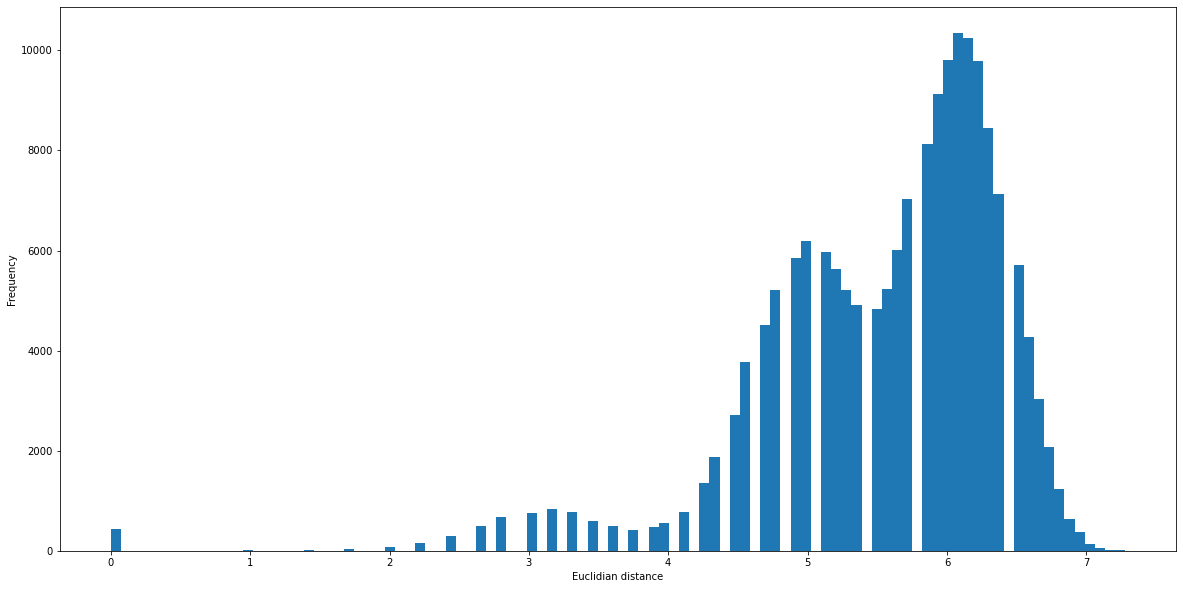

In [7]:
# Your solution here ###########################################################
plt.figure(figsize=(20, 10))
plt.hist(euclidian_distance.flatten(), bins=100)
plt.xlabel('Euclidian distance')
plt.ylabel('Frequency')
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

#### Part 1.2: Building graphs

**1.2.1 [2pt]** First, we will create an adjacency matrix for the papers by thresholding the Euclidean distance matrix.
The resulting (unweighted) adjacency matrix should have entries
$$ A_{ij} = \begin{cases} 1, \; \text{if} \; d(i,j)< \mathbb{E}[D], \; i \neq j, \\ 0, \; \text{otherwise.} \end{cases} $$

Build such adjacency matrix using the average distance as threshold

In [8]:
# Your solution here ###########################################################
# apply the threshold
A_feature = np.zeros_like(euclidian_distance)
A_feature[euclidian_distance < mean_distance] = 1
# i=j => 0
np.fill_diagonal(A_feature, 0) 
# check if the thresholding is correct
assert np.all(euclidian_distance[A_feature == 1] < mean_distance)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**1.2.2 [3pt]** Now read the `cora.cites` file and construct the citation graph by converting the given citation connections into an adjacency matrix `A_citation`.

*Hint:*
- The edges are between `paper_id`s. Not all integers correspond to IDs;
- Check the README for the connection description

In [9]:
cora_cites = np.genfromtxt('cora/cora.cites', delimiter='\t', dtype=int)
# extract the two columns of cora_cites array
citing_papers = cora_cites[:, 0]
cited_papers = cora_cites[:, 1]
# get graph edges and flatten them for processing
print("Cites head:")
print(cora_cites[:5], end="\n\n")

# Your solution here ###########################################################
# Get unique paper IDs
paper_ids = np.unique(cora_cites)
# Create adjacency matrix
num_papers = len(paper_ids)
A_citation = np.zeros((num_papers, num_papers))
for i, j in cora_cites:
    A_citation[np.where(paper_ids == i), np.where(paper_ids == j)] = 1
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Adj shape:", A_citation.shape)

Cites head:
[[     35    1033]
 [     35  103482]
 [     35  103515]
 [     35 1050679]
 [     35 1103960]]

Adj shape: (2708, 2708)


**1.2.3 [2pt]** Get the adjacency matrix of the citation graph for the field that you chose.
You have to appropriately reduce the adjacency matrix of the citation graph.

In [10]:
# Your solution here ###########################################################
# get index of genetic ids in the paper_ids
genetic_ids = np.where(np.isin(paper_ids, df_genetic.index))[0]
# get the submatrix of the adjacency matrix
A_citation = A_citation[genetic_ids][:, genetic_ids]
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print("Adj shape:", A_citation.shape)

Adj shape: (418, 418)


**1.2.4 [1pt]** Test whether the citation graph is directed or undirected.

*Hint:* You can check if the adjacency is symmetric.

In [11]:
# Your solution here ###########################################################
# check if the adjacency matrix is symmetric
print(np.all(A_citation == A_citation.T))
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

False


The matrix is asymmetric therefore the graph is directed , which makes sense since a paper could cite another paper without being cited back

### Question 2 [18pt]: Degree Distribution and Moments

**2.1 [1pt]** Compute the total number of edges in each graph

In [12]:
# Your solution here ###########################################################
num_edges_citation = np.sum(A_citation)
num_edges_feature = np.sum(A_feature) / 2

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the citation graph: {num_edges_citation}")

Number of edges in the feature graph: 35340.0
Number of edges in the citation graph: 848.0


**2.2 [2pt]** Plot both in-degree and out-degree distributions histogram for each of the graphs.

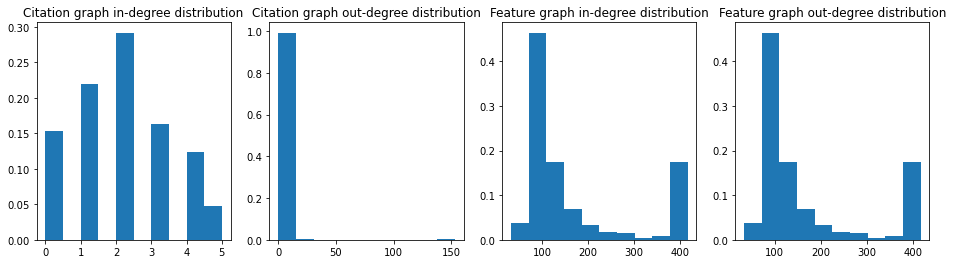

In [13]:
# Your solution here ###########################################################

# In degrees
degrees_feature_in= np.sum(A_feature, axis=0)
degrees_citation_in= np.sum(A_citation, axis=0)


# Out degrees
degrees_feature_out= np.sum(A_feature, axis=1)
degrees_citation_out = np.sum(A_citation, axis=1)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

deg_hist_normalization = np.ones(degrees_citation_in.shape[0]) / degrees_citation_in.shape[0]
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].set_title('Citation graph in-degree distribution')
axes[0].hist(degrees_citation_in, weights=deg_hist_normalization);
axes[1].set_title('Citation graph out-degree distribution')
axes[1].hist(degrees_citation_out, weights=deg_hist_normalization);
axes[2].set_title('Feature graph in-degree distribution')
axes[2].hist(degrees_feature_in, weights=deg_hist_normalization);
axes[3].set_title('Feature graph out-degree distribution')
axes[3].hist(degrees_feature_out, weights=deg_hist_normalization);

**2.3 [2pt]** From here onwards, we will consider only undirected graphs. If any of the graph is directed, make it undirected. Then compute the degree distribution and compare with the above ones.

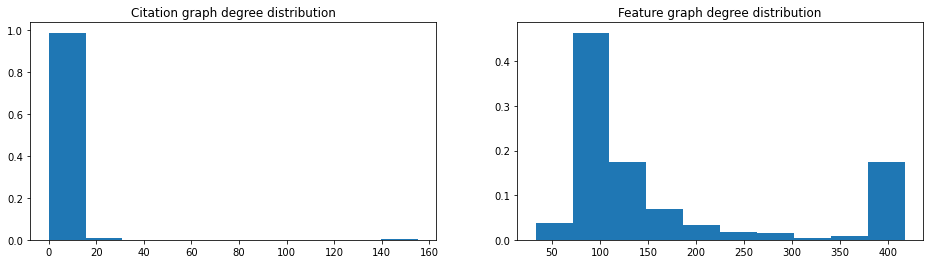

In [14]:
# Your solution here ###########################################################
# Transform the adjacency matrix to undirected
A_citation = A_citation + A_citation.T
A_feature = A_feature + A_feature.T
A_citation[A_citation > 1] = 1
A_feature[A_feature > 1] = 1
# Degree distribution
degrees_citation = np.sum(A_citation, axis=1)
degrees_feature = np.sum(A_feature, axis=1)



fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(degrees_citation, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(degrees_feature, weights=deg_hist_normalization);
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

**2.4 [2pt]** Calculate the first and second moments of the degree distribution of each graph.

In [15]:
def calculate_moment(degree,n):
    return np.mean(np.power(degree, n))

In [16]:
# Your solution here ###########################################################
cit_moment_1=calculate_moment(degrees_citation,1)
cit_moment_2=calculate_moment(degrees_citation,2)
feat_moment_1=calculate_moment(degrees_feature,1)
feat_moment_2=calculate_moment(degrees_feature,2)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

print(f"1st moment of citation graph: {cit_moment_1}")
print(f"2nd moment of citation graph: {cit_moment_2}")
print(f"1st moment of feature graph: {feat_moment_1}")
print(f"2nd moment of feature graph: {feat_moment_2}")

1st moment of citation graph: 3.9569377990430623
2nd moment of citation graph: 78.53588516746412
1st moment of feature graph: 169.0909090909091
2nd moment of feature graph: 43523.6985645933


**2.5 [3pt]** Explain what information the moments provide about the graphs.
Discuss about the differences in moments between graphs by comparing their degree distributions.

**Your answer here:** (To change)
The first moment, also known as the mean or expected value, provides information about the average degree of the graph. It is calculated by summing the degrees of all nodes and dividing by the number of nodes in the graph. A higher mean degree indicates that the nodes in the graph are more interconnected and that there are more edges overall.

The second moment, also known as the variance, provides information about the spread of the degree distribution. It is calculated by summing the squared differences between each node's degree and the mean degree, and then dividing by the number of nodes in the graph. A higher variance indicates that the degree distribution is more spread out, with some nodes having many more edges than others.

Comparing the moments of different graphs can reveal differences in their degree distributions. For example, consider two graphs with the same number of nodes but different degree distributions. The first graph has a bell-shaped degree distribution centered around the mean degree, while the second graph has a skewed degree distribution with a few nodes having many more edges than the rest.

The first moment of the first graph would be higher than the first moment of the second graph since the average degree is higher. However, the second moment of the second graph would be higher than the second moment of the first graph since the degree distribution is more spread out.

In general, graphs with higher variance in their degree distributions tend to have a few nodes with very high degrees, known as "hubs." These hubs play an important role in many network processes and can have a significant impact on the graph's structure and function.


**2.6 [2pt]** Select the 20 largest hubs for each of the graphs and remove them. Observe the sparsity pattern of the adjacency matrices of the citation and feature graphs before and after such a reduction.

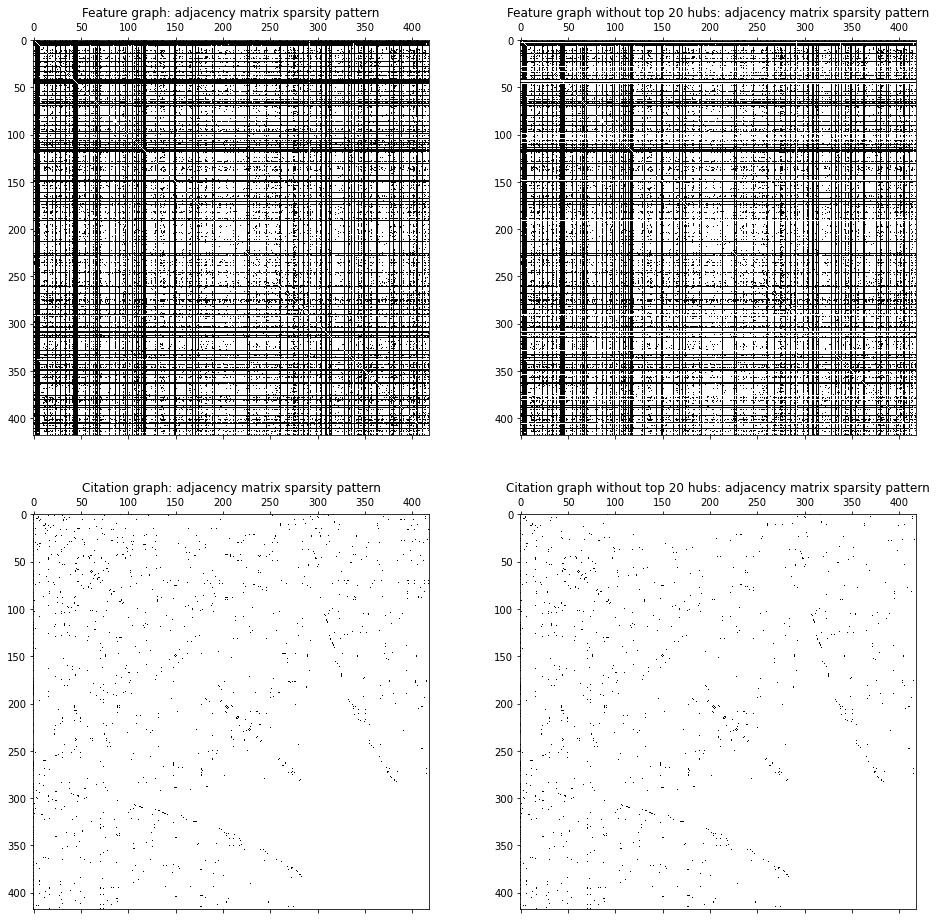

In [17]:
# Your solution here ###########################################################
# get degrees of the new unordered one
feature_hubs = np.argsort(-degrees_feature)[:20]
citation_hubs = np.argsort(-degrees_citation)[:20]
reduced_A_citation= A_citation.copy()
reduced_A_feature= A_feature.copy()
reduced_A_feature[feature_hubs, :] = 0
reduced_A_citation[citation_hubs, :] = 0



#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].set_title('Feature graph: adjacency matrix sparsity pattern')
axes[0, 0].spy(A_feature);
axes[0, 1].set_title('Feature graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[0, 1].spy(reduced_A_feature);
axes[1, 0].set_title('Citation graph: adjacency matrix sparsity pattern')
axes[1, 0].spy(A_citation);
axes[1, 1].set_title('Citation graph without top 20 hubs: adjacency matrix sparsity pattern')
axes[1, 1].spy(reduced_A_citation);


**2.7 [1pt]** Plot the new degree distribution histograms.

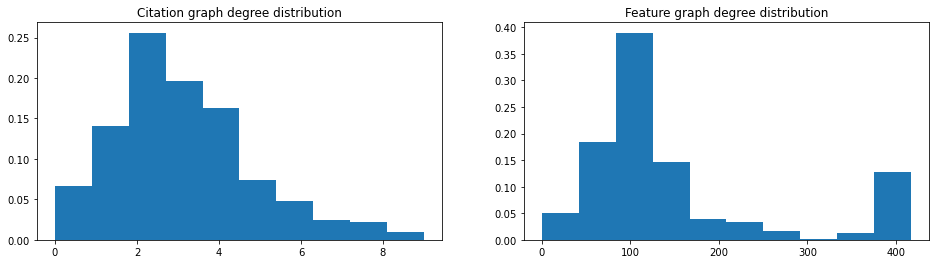

In [18]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Degree distribution
reduced_degrees_cit = np.sum(reduced_A_citation, axis=1)
reduced_degrees_feat = np.sum(reduced_A_feature, axis=1)


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
deg_hist_normalization = np.ones(reduced_degrees_feat.shape[0]) / reduced_degrees_feat.shape[0]

fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].set_title('Citation graph degree distribution')
axes[0].hist(reduced_degrees_cit, weights=deg_hist_normalization);
axes[1].set_title('Feature graph degree distribution')
axes[1].hist(reduced_degrees_feat, weights=deg_hist_normalization);

**2.8 [1pt]** Compute the first and second moments for the new graphs.

In [19]:
# Your solution here ###########################################################
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
reduced_cit_moment_1=calculate_moment(reduced_degrees_cit,1)
reduced_cit_moment_2=calculate_moment(reduced_degrees_cit,2)
reduced_feat_moment_1=calculate_moment(reduced_degrees_feat,1)
reduced_feat_moment_2=calculate_moment(reduced_degrees_feat,2)


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print("Citation graph first moment:", reduced_cit_moment_1)
print("Citation graph second moment:", reduced_cit_moment_2)
print("Feature graph first moment: ", reduced_feat_moment_1)
print("Feature graph second moment: ", reduced_feat_moment_2)

Citation graph first moment: 2.9760765550239237
Citation graph second moment: 12.435406698564593
Feature graph first moment:  149.13875598086125
Feature graph second moment:  35203.65071770335


**2.9 [2pt]** Print the number of edges in the reduced graphs.

In [20]:
# Your solution here ###########################################################
print("Reduced feature graph edges:",reduced_A_feature.sum()/2)
print("Reduced citation graph edges:",reduced_A_citation.sum()/2)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Reduced feature graph edges: 31170.0
Reduced citation graph edges: 622.0


**2.10 [2pt]** Describe the effect of removing the hubs in both networks and compare them. Look at the percentage changes for each moment and explain which of the moments is affected the most and in which graph. Discuss about the meaning of this change.

**Hint:** Examine the degree distributions.

**Your answer here:** 


### Question 3 [8pt]: Pruning, sparsity, paths

**3.1 [1pt]** By adjusting the threshold of the euclidean distance matrix, prune the feature graph so that its number of edges is roughly close (within a hundred edges) to the number of edges in the citation graph.

In [21]:
num_edges_citation = np.sum(A_citation) / 2
num_edges_feature = np.sum(A_feature) / 2

print(f"Number of edges in the citation graph: {num_edges_citation}")
print(f"Number of edges in the feature graph: {num_edges_feature}")

Number of edges in the citation graph: 827.0
Number of edges in the feature graph: 35340.0


In [22]:
A_feature_pruned = (euclidian_distance > 6.79).astype(float)
A_feature_pruned -= np.diag(np.diag(A_feature_pruned))
A_feature_pruned += A_feature_pruned.T
A_feature_pruned[A_feature_pruned > 1] = 1
num_edges_feature_pruned = A_feature_pruned.sum() // 2
print('Number of edges in the feature graph to prune:', num_edges_feature_pruned)


Number of edges in the feature graph to prune: 616.0


In [23]:
# Print the results
print(f"Number of edges in the feature graph: {num_edges_feature}")
print(f"Number of edges in the feature graph after pruning: {num_edges_feature_pruned}")
print(f"Number of edges in the citation graph: {np.sum(A_citation) / 2}")




Number of edges in the feature graph: 35340.0
Number of edges in the feature graph after pruning: 616.0
Number of edges in the citation graph: 827.0


Check your results by comparing the sparsity patterns and total number of edges between the graphs.

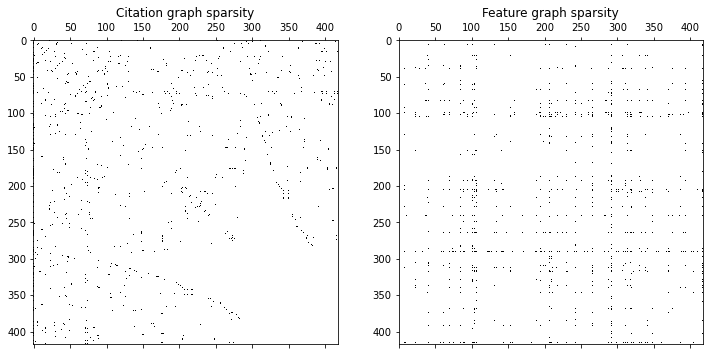

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set_title('Citation graph sparsity')
axes[0].spy(A_citation);
axes[1].set_title('Feature graph sparsity')
axes[1].spy(A_feature_pruned);

Let $C_{k}(i,j)$ denote the number of paths of length $k$ from node $i$ to node $j$. 

We define the path matrix $P$, with entries
$ P_{ij} = \displaystyle\sum_{k=0}^{N}C_{k}(i,j). $

**3.2 [1pt]** Calculate the path matrices for both the citation and the unpruned feature graphs for $N =10$.  

*Hint:* Use [powers of the adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#Matrix_powers).

In [25]:
# Calculate the path matrix P for the citation graph
path_matrix_citation = np.zeros_like(A_citation)
for k in range(0, 11):
    path_matrix_citation += np.linalg.matrix_power(A_citation, k)

# Calculate the path matrix P for the unpruned feature graph
path_matrix_feature = np.zeros_like(A_feature)
for k in range(0, 11):
    path_matrix_feature += np.linalg.matrix_power(A_feature, k)

Check the sparsity pattern for both of path matrices.

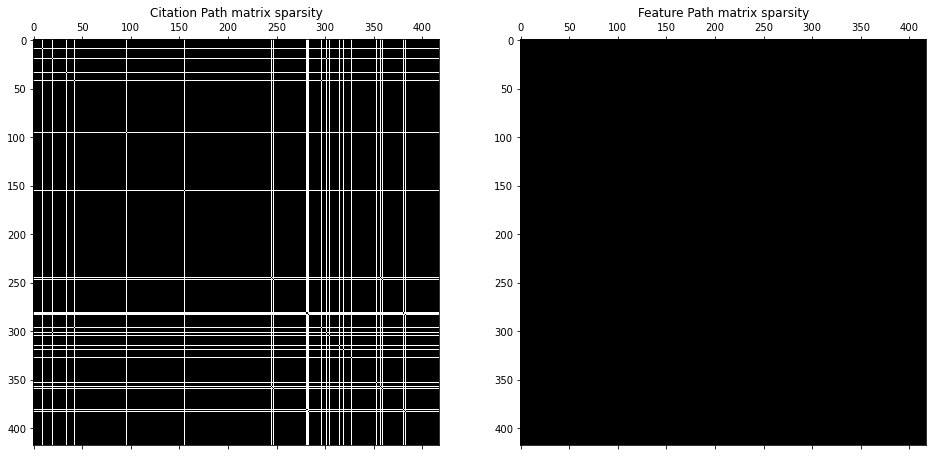

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
axes[0].set_title('Citation Path matrix sparsity')
axes[0].spy(path_matrix_citation);
axes[1].set_title('Feature Path matrix sparsity')
axes[1].spy(path_matrix_feature);

**3.3 [2pt]** Now calculate the path matrix of the pruned feature graph for $N=10$. Plot the corresponding sparsity pattern.
Describe the differences and motivate.

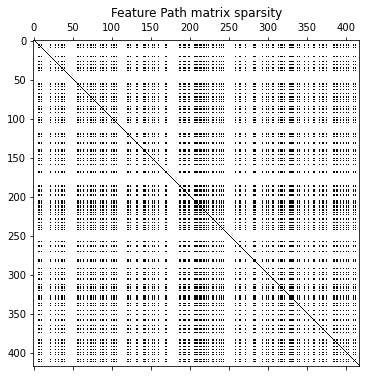

In [27]:
# Your solution here ###########################################################
# Calculate the path matrix P for the pruned feature graph
#^^^^^^^

path_matrix_pruned = np.zeros_like(A_feature_pruned)
for k in range(0, 11):
    path_matrix_pruned += np.linalg.matrix_power(A_feature_pruned, k)


#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.figure(figsize=(12, 6))
plt.title('Feature Path matrix sparsity')
plt.spy(path_matrix_pruned);


**Your answer here:** 

The path matrix for the pruned feature graph exhibits entries of zero, in contrast to the unpruned path matrix which does not. This dissimilarity can be attributed to the removal of edges with low feature importance during the pruning process, which subsequently leads to a sparser graph. The sparsity pattern observed in the pruned graph is a direct consequence of the removal of such edges and the concomitant simplification of the graph structure.


**3.4 [2pt]** Describe how you can use the above process of counting paths to determine whether a graph is connected or not. State whether the original (unpruned) feature graph is connected.

**Your answer here:** 

The employment of the path matrix $P$ is instrumental in ascertaining the connectivity status of a given graph. In particular, when a graph is connected, the values of every element within $P$ will exceed zero. Conversely, in the event that the graph is not connected, at least one value within $P$ will equal zero.

In [28]:
# check if every entry in the unpunred path matrix is non-zero
if np.all(path_matrix_feature):
    print("Every entry in the path matrix of the unpruned feature graph is non-zero, so the graph is connected.")
else:
    print("Not every entry in the path matrix of the unpruned feature graph is non-zero, so the graph is not connected.")

Every entry in the path matrix of the unpruned feature graph is non-zero, so the graph is connected.


**3.5 [1pt]** Supposing the graph is connected, describe how to measure its diameter using the path matrix.

**Your answer here:** 

The diameter of a graph is characterized as the length of the longest shortest path between any two vertices of the graph. It is important to note that the shortest path is defined as the path with the minimum number of edges between the two vertices.

Subsequently, the diameter is the minimum value of path length ($N$)such that there are no zero entries present in the path matrix. This value of $N$ signifies the minimum path length at which paths between all pairs of nodes in the graph are present.

**3.6 [1pt]** If any of your graphs is connected, calculate the diameter using that process.

In [29]:
# Your solution here ###########################################################

# compute the minimum value of N for which the graph has no zero entries in the path matrix
path_matrix_feature_copy = np.zeros_like(A_feature)
N = path_matrix_feature_copy.shape[0]

for i in range(N):
    path_matrix_feature_copy += np.linalg.matrix_power(A_feature, i)
    # check if every entry in the path matrix is non-zero
    if np.all(path_matrix_feature_copy):
        # if so, the diameter is i
        diameter = i
        # break the loop as we have found the diameter and do not need to continue
        break


print(f"The diameter is: {diameter}")

The diameter is: 2


### Question 4 [8pt]: Shortest path

Here, we calculate the shortest path from a source node to a target node. A classic method for finding the shortest path on unweighted networks is Breadth-First Search (BFS) method. Check the BFS steps in the Lecture 'Graph Theory Basis'.

To this end, we first define a function for finding the neighboring nodes of a specified node x. 

In [30]:
### Get the neighboring set of node x
def find_neighbors(x):
    return [i for i in range(A_feature.shape[0]) if A_feature[x][i]>0]

**4.1 [2pt]** Calculate the path length from the source node to the target node by filling the missing code in the algorithm: 

In [36]:
source_node, target_node, path_length = 0, 10, 0
source_set = [source_node]
path = []
stop_finding = 0
iteration_number = A_feature.shape[0]
i = 0
if source_node==target_node:
    stop_finding = 1
    path.append([source_node,target_node,path_length])
while stop_finding == 0 and i < iteration_number:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        if target_node in neighbors:
            path.append([n,target_node,path_length])
            stop_finding = 1
            break
        else:
            for nn in neighbors:
                path.append([n,nn,path_length])
            source_set_new += neighbors
    path_length += 1
    source_set = source_set_new.copy()
    i += 1
if stop_finding == 0:
    path_length = ['Infinity']
    shortest_path = ['None']
else:
    child_node = target_node
    shortest_path = [target_node]
    for i in range(path_length-1,-1,-1):
        parent_node = [x for [x, y, z] in path if y==child_node and z==i]
        shortest_path.append(parent_node[0])
        child_node = parent_node[0] #Select one of the parent nodes as the child node in previous round
    shortest_path.reverse()

print(f"The shortest path length from node {source_node} to node {target_node} is: {path_length}")
print(f"One shortest path is: {shortest_path}")


The shortest path length from node 0 to node 10 is: 2
One shortest path is: [0, 2, 10]


**4.2 [2pt]** Get all edges visited by BFS starting from a source node by filling the missing lines in the following code: 

In [37]:
# All edges visited by BFS method starting from a source node
BFS_edges = []
unexplored_list = list(range(A_feature.shape[0]))
source_node = 0
source_set = [source_node]
unexplored_list.remove(source_node) 
stop_finding = 0
while stop_finding == 0:
    source_set_new = []
    for n in source_set:
        neighbors = find_neighbors(n)
        for nn in neighbors:
            if nn in unexplored_list:
                # Add edge to BFS_edges
                BFS_edges.append((n,nn)) 
                # Remove node from unexplored_list
                unexplored_list.remove(nn) 
                # Add node to source_set_new
                source_set_new.append(nn) 
    if not source_set_new:
        stop_finding = 1      
    else:
        source_set = source_set_new.copy()
print(f"Edges visited by Breadth-First Search method starting from node {source_node}:")
list(BFS_edges)[:5]


Edges visited by Breadth-First Search method starting from node 0:


[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6)]

**4.3 [2pt]** Explain the difference between BFS algorithm and the Dijkstra's algorithm.

**Your answer here:**

BFS is used to look into each node and edge in a graph, beginning with a predetermined source node. Before moving on to the nodes at a higher distance, it explores all nodes within a certain distance of the source. The the weights or costs related to the edges in the graph are not taken into account by BFS.It follows that BFS can be used to find the shortest path in an unweighted graph or to iteratively navigate a graph. Dijkstra's algorithm, on the other hand, is used to find the shortest path between a source node and all other nodes in a weighted graph. It takes into account the weights or costs associated with the edges in the graph and finds the path with the lowest cost to each node. Dijkstra's algorithm employs a priority queue to select the next node to visit based on its current distance from the source node, and it updates all of its neighbors' distances accordingly. 


**4.4 [2pt]** Check if your guess was correct using [NetworkX](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html).

*Note:* usage of NetworkX is only allowed in this part of Section 1.

Compute the diameter using NetworkX.

In [39]:
import networkx as nx

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A_feature)

# Compute the diameter of the graph
diameter = nx.diameter(G)


print(f"Diameter according to networkx: {diameter}")


Diameter according to networkx: 2


Let us now check our results of BFS method using NetworkX:
<br>
(1) As before, print the first 5 BFS visited edges
<br>
(2) As before, calculate and print the shortest path length from node 0 to node 10 

In [40]:
# Perform BFS starting from node 0
BFS_edges = nx.bfs_edges(G, 0)

# Print the first 5 edges visited by BFS
print("First 5 edges visited by BFS using networkx:")
for i, edge in enumerate(BFS_edges):
    if i == 5:
        break
    print(edge)



First 5 edges visited by BFS using networkx:
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)


In [42]:
# calculate and print the shortest path from node 0 to node 10
shortest_path = nx.shortest_path(G, 0, 10)
print(f"Shortest path from node 0 to node 10: {shortest_path}")

Shortest path from node 0 to node 10: [0, 2, 10]
